In [29]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from scipy.ndimage.filters import gaussian_filter1d

%matplotlib inline

48.49456
28.04192
1.29664
3.18144


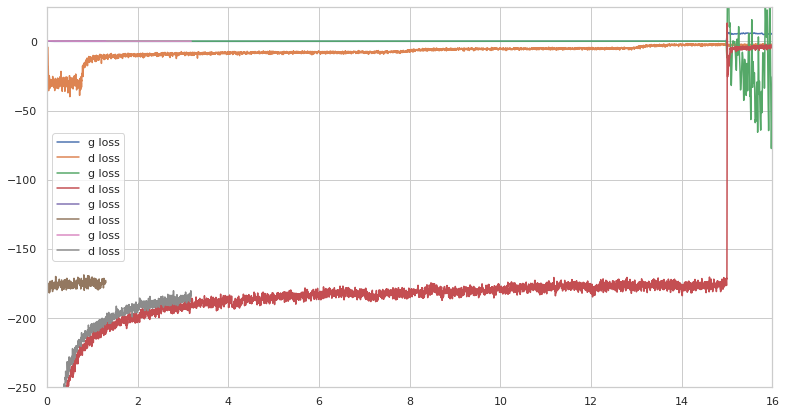

In [30]:
#experiment_ids = ["08b90eb5f4754022a2267482db718c02","3d29d853c8974694800287651fc7a2f5"]
#experiment_ids = ["c1d7840b73e548698c991902af5d9355", "4b5b4cabc1c74575840f559f4c42a0f4"]
#experiment_num = 49
#experiment_num = 37
#experiment_num = 39
#experiment_num = 51
#experiment_num = 52 
#experiment_ids = ["921d1a3cce6248478f707cb5fd4bd387"]
experiment_num = 53
experiment_ids = ["2f4a7e260acf4fb4807a6c679631af61", "2ea7de284e3340719730293fc3a53207"
                 ,"9c1597da93c147a79e0b3581e26cdb00"]
experiment_num = 55
experiment_ids = ["da4ca413b1bd43f191a872c70ee1a83b","d8986997624441619d179f598de8531c",
                  "29e57e7d05ff48ae8a98fefa0b7daf24","93cb32af8db14b42b3600971077c74ec"]


sigma=10

sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(13, 7))
nsample = 6250
for experiment_id in experiment_ids:
    mlflow_dir = "/home/dwhan89/workspace/cosmikyu/output/mlruns/{}/{}/metrics".format(experiment_num, experiment_id)
    def mlflow_path(x):
        return os.path.join(mlflow_dir, x)

    g_loss = np.loadtxt(mlflow_path('G loss'))
    d_loss = np.loadtxt(mlflow_path('D loss'))

    xg = np.linspace(0, len(d_loss[:,0])/nsample, len(g_loss[:,0]))
    xd = np.linspace(0, len(d_loss[:,0])/nsample, len(d_loss[:,0])) 
    print(np.max(xg))



    plt.plot(xg, gaussian_filter1d(g_loss[:,1], sigma=sigma), label="g loss", alpha=1)
    plt.plot(xd, gaussian_filter1d(d_loss[:,1], sigma=sigma), label="d loss", alpha=1)
plt.xlim(0,16)
plt.ylim(-250,25)
#plt.yscale("log")
plt.legend()


\

In [ ]:

sigma=5
sns.set()
sns.set_style("whitegrid")
plt.figure(figsize=(13, 7))
for experiment_id in experiment_ids:
    mlflow_dir = "/home/dwhan89/workspace/cosmikyu/output/mlruns/{}/{}/metrics".format(experiment_num, experiment_id)

    def mlflow_path(x):
        return os.path.join(mlflow_dir, x)


    g_loss = np.loadtxt(mlflow_path('G loss'))
    d_loss = np.loadtxt(mlflow_path('D loss'))

    xg = np.linspace(0, len(d_loss[:,0])/nsample, len(g_loss[:,0]))
    xd = np.linspace(0, len(d_loss[:,0])/nsample, len(d_loss[:,0])) 
    print(np.max(xg))
    
    plt.plot((xg[:-1]+xg[1:])/2, (gaussian_filter1d(np.abs((g_loss[1:,1]-g_loss[:-1,1])/(xg[:-1]+xg[1:])), sigma=sigma)), label="g loss")
    plt.plot((xd[:-1]+xd[1:])/2, (gaussian_filter1d(np.abs((d_loss[1:,1]-d_loss[:-1,1])/(xd[:-1]+xd[1:])), sigma=sigma)), label="d loss")
    #plt.ylim(-50,50)
plt.xlim(0,50)
plt.yscale("log")

plt.legend()